# *** Bank Marketing Decison Tree Classifier ***

___
### Introduction to the Bank dataset
The dataset used in this project comes from a **Portuguese bank** and provides details about a **marketing campaign** focused on promoting **term deposit** products to customers. Term deposits are a type of savings account offering a fixed interest rate over a specific period, providing a secure and stable investment option. The campaign's objective was to motivate both existing and potential clients to subscribe to these term deposits.

This dataset includes **11,163 entries** and **17 features**, with each entry representing a unique customer. The features capture various customer details and their interactions with the bank throughout multiple marketing campaigns. 
__


Below is a detailed description of the columns in the dataset:

- **age**: The age of the customer. This is important because age may influence financial decision-making, risk tolerance, and interest in term deposits.

- **job**: The type of job the customer holds (e.g., "admin.", "blue-collar", "technician", etc.). Job type could reflect the customer’s income level, job stability, and overall financial behavior, which may impact their likelihood of subscribing to a term deposit.

- **marital**: The marital status of the customer (e.g., "married", "single", "divorced"). Marital status can influence financial decisions, as people with families may have different savings goals compared to singles.

- **education**: The level of education the customer has attained (e.g., "primary", "secondary", "tertiary"). A customer’s education level may correlate with their financial knowledge, which could affect their interest in financial products like term deposits.

- **balance**: The average yearly balance in euros. A higher balance could indicate a wealthier or more financially stable customer who may be more likely to invest in a term deposit.

- **contact**: The type of communication used to reach the customer (e.g., "cellular", "telephone"). This column helps understand the methods the bank uses to contact the customer, as different contact types may be more or less effective in reaching customers.

- **day**: The last contact day of the month. This indicates when the final contact attempt was made during the month, which might influence the customer's decision-making process based on timing.

- **month**: The last contact month of the year. The month of contact could reveal seasonal trends that may influence a customer’s decision to invest in a term deposit.

- **duration**: The duration of the last contact in seconds. Longer conversations may indicate higher engagement from the customer, which could increase the likelihood of a positive response.

- **campaign**: The number of contacts made during the current campaign. A **campaign** refers to a series of marketing efforts designed to persuade customers to subscribe to a term deposit. Multiple contacts may indicate persistence and effort to convert the customer.

- **pdays**: The number of days since the customer was last contacted. If the value is **-1**, it means the customer has never been contacted before. The recency of contact could affect the customer’s response.

- **previous**: The number of contacts made during the previous marketing campaign. This column provides context about past interactions and helps assess how previous efforts may influence the current campaign.

- **poutcome**: The outcome of the previous marketing campaign (e.g., "failure", "success", "nonexistent"). This column can help determine whether past success or failure influences future marketing efforts.

- **deposit**: Whether the customer subscribed to a term deposit ("yes" or "no"). This is the **target variable** of the project, and the goal is to predict this column.

- **default**: Whether the customer has a history of defaulting on credit or loan payments ("yes" or "no"). A history of default could influence the customer's financial stability and their willingness to invest in term deposits.

- **housing**: Whether the customer has a housing loan ("yes" or "no"). A housing loan may impact the customer’s financial flexibility, which could make them less likely to subscribe to a term deposit.

- **loan**: Whether the customer has a personal loan ("yes" or "no"). Personal loans can similarly affect a customer's ability to invest in a term deposit, depending on their current financial obligations.
___


### Aim of the Project
___

The primary aim of this project is to build a **predictive model** that can accurately predict whether a customer will subscribe to a term deposit, based on their demographic information, contact history, and engagement with previous marketing campaigns. By analyzing these customer features, the goal is to improve the bank's ability to target the right customers, ultimately leading to better conversion rates for their marketing efforts.

In this project, a **Decision Tree Classifier** will be used to create the predictive model. The Decision Tree Classifier will help identify the most important factors that influence whether a customer subscribes to a term deposit, allowing the bank to optimize their marketing strategies.

By applying this model to a sample of customer data, the project will evaluate the effectiveness of using customer characteristics to predict their likelihood of subscribing to a term deposit, improving the overall efficiency of the marketing campaigns.
___

## **_Let's Get Started with Building the Decision Tree Classifier_**

### 1,Importing necessary libraries

In [ ]:
# Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

### 2,Loading the dataset

In [1287]:
# Load the dataset from 
df_bank = pd.read_csv('Bank.csv') 

# Show the first few rows to check the data
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### 2. Data Cleaning

#### _Check for duplicated rows_

In [1288]:
df_bank.duplicated().sum()

0

#### _Check for missing values_

In [1289]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### 3,Explore the dataset

#### _3.1 Concise summary of the dataset_

In [1290]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


___
### Observations

- The dataset contains **11,162 entries** and **17 columns**.
- Out of these columns:
    - **7 columns** have a data type of `int64`.
    - **10 columns** have a data type of `object`.
- There are **no missing values** in any of the columns.

___

#### _3.2 Summary Statistics of the dataset_

In [1291]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


___ 
#### Observations

- **Age**:
  - The average age of customers is approximately 41.2 years.
  - The age range spans from 18 to 95 years, indicating a broad demographic.

- **Balance**:
  - The average balance is around 1528.5, with a high standard deviation of 3225.4, suggesting significant variation in account balances.
  - The minimum balance is -6847, indicating that some customers have negative balances (likely due to overdrafts).
  - The maximum balance is 81204, suggesting a few high-balance customers.

- **Day**:
  - The average day of contact is approximately 15.7, which may indicate a preference for mid-month contact.
  - The minimum and maximum values of 1 and 31 show that contacts span all days of the month.

- **Duration**:
  - The average duration of contact is 372 seconds, with a standard deviation of 347, indicating some variability in call durations.
  - The minimum duration is 2 seconds, while the maximum is 3881 seconds, suggesting a wide range in call times.

- **Campaign**:
  - On average, each customer was contacted about 2.5 times within a campaign.
  - The maximum number of contacts to a single customer is 63, indicating some cases of very high contact frequency.

- **Pdays**:
  - The mean is 51.3, but there is a large standard deviation of 108.8, suggesting varied intervals since the last contact.
  - The minimum value of -1 typically represents no previous contact, and most values in the 25th, 50th, and 75th percentiles are also -1, meaning many customers were not previously contacted.

- **Previous**:
  - The average previous contact count is 0.83, with a high maximum of 58, indicating that while most customers had few previous contacts, some were contacted multiple times.
  - The 25th, 50th, and 75th percentiles are all at or near 0, indicating most customers had minimal prior contact history.
  ___

#### _3.3 pie chart: distribution of Target variable(deposit)_

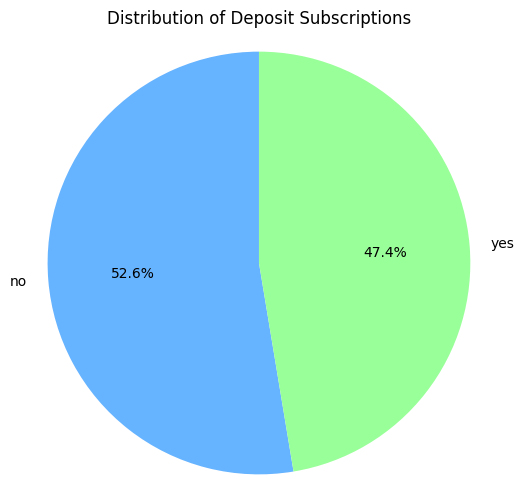

In [1292]:
# Assuming df_bank is your DataFrame and the 'deposit' column exists
deposit_counts = df_bank['deposit'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Deposit Subscriptions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

___
### Target Variable: `deposit`

The `deposit` column, which is the target variable for the decision tree classifier, has the following distribution:

- **No**: 5,873 instances (customers who did not subscribe to a term deposit).  
- **Yes**: 5,289 instances (customers who subscribed to a term deposit).  

### Interpretation

This dataset has a reasonably balanced distribution between the "yes" and "no" classes. Such balance is beneficial for training a decision tree classifier as it reduces the risk of bias toward the majority class. A balanced dataset allows the model to effectively learn patterns for both classes, resulting in more accurate and reliable predictions.
___

### 4. Data Pre-processing

#### _4.1 Encoding categorical variables_

In [1293]:
categorical_cols = df_bank.select_dtypes(include=['object', 'category']).columns

# Display unique values for each categorical column
for col in categorical_cols:
    unique_vals = df_bank[col].unique()
    print(f"{col}: {len(unique_vals)} unique values, Example: {list(unique_vals)[:]}")  


job: 12 unique values, Example: ['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
marital: 3 unique values, Example: ['married', 'single', 'divorced']
education: 4 unique values, Example: ['secondary', 'tertiary', 'primary', 'unknown']
default: 2 unique values, Example: ['no', 'yes']
housing: 2 unique values, Example: ['yes', 'no']
loan: 2 unique values, Example: ['no', 'yes']
contact: 3 unique values, Example: ['unknown', 'cellular', 'telephone']
month: 12 unique values, Example: ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
poutcome: 4 unique values, Example: ['unknown', 'other', 'failure', 'success']
deposit: 2 unique values, Example: ['yes', 'no']


In [1294]:
# Initialize the encoders
ordinal_encoder = OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary']])
label_encoder = LabelEncoder()

# List of columns for which we will apply Label Encoding
label_encode_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Apply Ordinal Encoding for the 'education' column
df_bank['education'] = ordinal_encoder.fit_transform(df_bank[['education']])

# Apply Label Encoding for the rest of the columns
for col in label_encode_cols:
    df_bank[col] = label_encoder.fit_transform(df_bank[col])

# Check the encoded DataFrame
print(df_bank.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1        2.0        0     2343        1     0        2   
1   56    0        1        2.0        0       45        0     0        2   
2   41    9        1        2.0        0     1270        1     0        2   
3   55    7        1        2.0        0     2476        1     0        2   
4   54    0        1        3.0        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1  


___
- **Ordinal Encoding** has been applied to the `education` column, with ordered numeric values assigned based on predefined categories.
      - order unknown < primary < secondary < tertiary was used.  
- **Label Encoding** has been applied to specified categorical columns, converting their values into numeric labels.  
___

#### _4.2 Splitting the Data_

#### _Features and Target_

In [1295]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_bank.drop('deposit', axis=1)  # dropping target variable 'deposit'
y = df_bank['deposit']  # target variable (binary: yes/no)
print(X.shape)
print(y.shape)

(11162, 16)
(11162,)


___
The dataset consists of 17 columns, classified as follows:

- **16 independent variables (features)**
- **1 dependent variable (target):** `deposit`
___

#### _Train-set and Test-set_

In [1296]:
# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 8929
X_test: 2233


#### _Further split Train-set into new Train-set and Validation-set_

In [1297]:
# Further split the training data into training and validation sets (80% training, 20% validation)X
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2 ,random_state=42)
print(f"X_train: {len(X_train)}")
print(f"x_val: {len(X_val)}")

X_train: 7143
x_val: 1786


### 4.3 Model Building

#### _Base Line Model_

In [1298]:
acc_baseline = y_train.value_counts(normalize=True).max()

___
- **Baseline model**  is a simple, often trivial model that makes predictions based on basic assumptions, such as predicting the most frequent class or using a constant value 
- **Importance**: It serves as a benchmark for model performance. If the model's accuracy is lower than the baseline, it indicates that the model is not learning useful patterns.
___

#### _Building the Decision Tree Classifier_

In [1299]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4.4 Model Evaluation

In [1300]:
# Predicting on training data
y_predict = dt_classifier .predict(X_train)

# Calculating training accuracy
acc_train = accuracy_score(y_train, y_predict)

# Calculating validation accuracy using dt_classifier 's built-in score method
acc_val = dt_classifier .score(X_val, y_val)

# Printing accuracies
print("Baseline Accuracy:", round(acc_baseline, 3))
print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))


Baseline Accuracy: 0.529
Training Accuracy: 1.0
Validation Accuracy: 0.79


___
#### _Observations_
- The model performs significantly better than the baseline.  
- Perfect training accuracy (1.0) suggests overfitting.  
- Validation accuracy (0.79) indicates good generalization ,but Further tuning may be needed to avoid overfitting. 
___

### 4.5 Hyperparameter Tuning

In [1301]:
# Get and print the depth of the trained tree
tree_depth = dt_classifier.get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 24


#### _Find the max_depth with the closest training and validation accuracy to decrease overfitting_

Best max_depth where training and validation accuracies are closest: 5


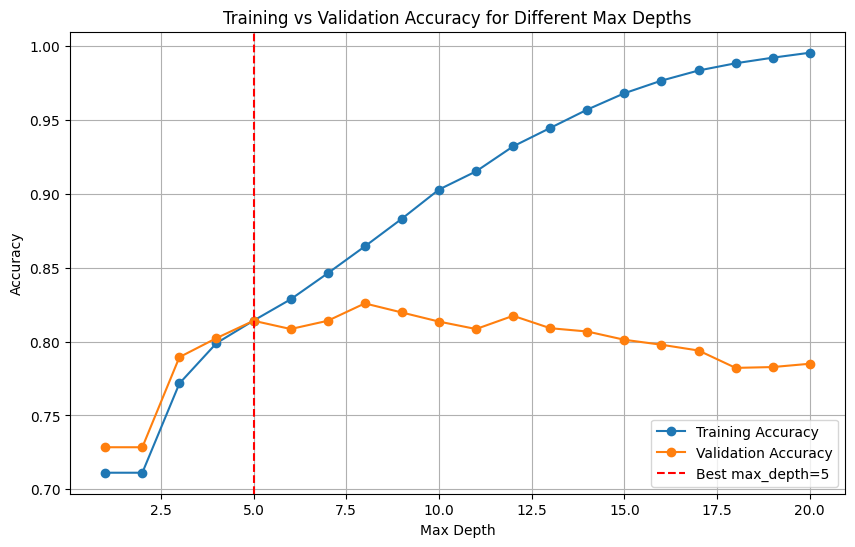

In [1302]:
# Initialize lists to store results
max_depth_range = range(1, 21)  # Test max_depth values from 1 to 20
train_accuracies = []
val_accuracies = []

# Iterate over max_depth values
for max_depth in max_depth_range:
    # Initialize and train the model
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, dt_classifier.predict(X_train))
    val_accuracy = accuracy_score(y_val, dt_classifier.predict(X_val))
    
    # Store the results
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Find the max_depth with the closest training and validation accuracy
closest_index = min(
    range(len(max_depth_range)),
    key=lambda i: abs(train_accuracies[i] - val_accuracies[i])
)
best_max_depth = max_depth_range[closest_index]
print(f"Best max_depth where training and validation accuracies are closest: {best_max_depth}")

# Plot training vs validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depth_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.axvline(x=best_max_depth, color='r', linestyle='--', label=f'Best max_depth={best_max_depth}')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for Different Max Depths')
plt.legend()
plt.grid(True)
plt.show()


In [1303]:
# Instantiate and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [1304]:
# Calculate and print training accuracy
acc_train = accuracy_score(y_train, dt_classifier.predict(X_train))
print("Training Accuracy:", round(acc_train, 2))

# Calculate and print validation accuracy
acc_val = accuracy_score(y_val, dt_classifier.predict(X_val))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.81
Validation Accuracy: 0.81


#### _Cross-Validation Check_

In [1305]:
# Calculate and print cross-validation accuracy
cv_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy: 0.7655


#### Trying the decision tree at max_depth=4

#### *** _Goal_ ***
- To find the balance between model performance and interpretability.

In [1306]:
# Instantiate and train the Decision Tree Classifier with max_depth=4
dt_classifier_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier_4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [1307]:
# Calculate and print training accuracy
acc_train_4 = accuracy_score(y_train, dt_classifier_4.predict(X_train))
print("Training Accuracy :", round(acc_train_4, 2))

# Calculate and print validation accuracy
acc_val_4 = accuracy_score(y_val, dt_classifier_4.predict(X_val))
print("Validation Accuracy :", round(acc_val_4, 2))

Training Accuracy : 0.8
Validation Accuracy : 0.8


In [1308]:
# Calculate and print cross-validation accuracy
cv_scores_4 = cross_val_score(dt_classifier_4, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores_4.mean():.4f}")

Cross-Validation Accuracy: 0.7736


___
#### _Key Observations:_

    max_depth=5 has slightly higher training and validation accuracy, but the cross-validation accuracy is slightly lower (0.7655 vs 0.7736). This suggests that while the model with max_depth=5 fits the training data better, it may be slightly overfitting (as cross-validation accuracy is not much higher than the validation accuracy).
    
    max_depth=4 shows a more consistent performance across training, validation, and cross-validation accuracies. Although the training accuracy is slightly lower (0.80 vs 0.81), the model with max_depth=4 is less prone to overfitting and might generalize better.SO,dt_classifier_4(with max_depth=4) will be used.
___

### 4.6 Final test of the model

In [1309]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred_test = dt_classifier_4.predict(X_test)

# Accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7913


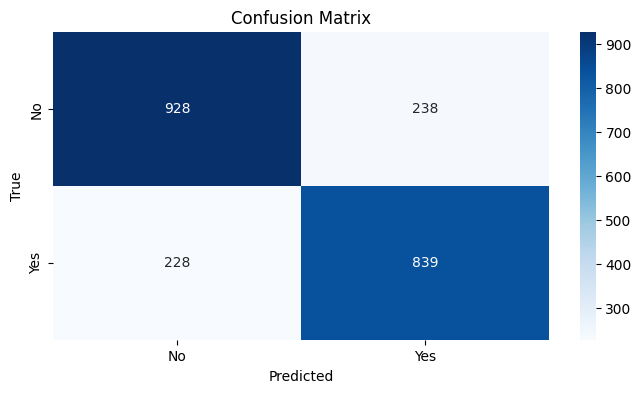

In [1310]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


___
#### _Interpretation of the Confusion matrix_
- True Negative (TN) = 928: The model correctly predicted 928 instances as the negative class ("No").
- False Positive (FP) = 238: The model incorrectly predicted 238 instances as the positive class ("Yes"), when they were actually negative ("No").
- False Negative (FN) = 228: The model incorrectly predicted 228 instances as the negative class ("No"), when they were actually positive ("Yes").
- True Positive (TP) = 839: The model correctly predicted 839 instances as the positive class ("Yes").
___

In [1311]:
# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1166
           1       0.78      0.79      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



___
#### _interpretation of the classification report:_

#### For Class 0 ("No"):
- **Precision** = 0.80: When the model predicts "No," it's correct 80% of the time.
- **Recall** = 0.80: The model correctly identifies 80% of all actual "No" instances.
- **F1-Score** = 0.80: The harmonic mean of precision and recall is 80%, indicating a balanced performance for the "No" class.

#### For Class 1 ("Yes"):
- **Precision** = 0.78: When the model predicts "Yes," it's correct 78% of the time.
- **Recall** = 0.79: The model correctly identifies 79% of all actual "Yes" instances.
- **F1-Score** = 0.78: The F1-score for "Yes" is 78%, showing a balanced performance similar to class "No."

#### Overall Performance:
- **Accuracy** = 0.79: The model is correct 79% of the time across all predictions.
- **Macro Average** = 0.79: This is the average performance across both classes, giving equal weight to each class's metrics.
- **Weighted Average** = 0.79: This takes into account the number of instances in each class and gives the overall performance score, which is 79%.
___

### 4.7 Visualize the Tree

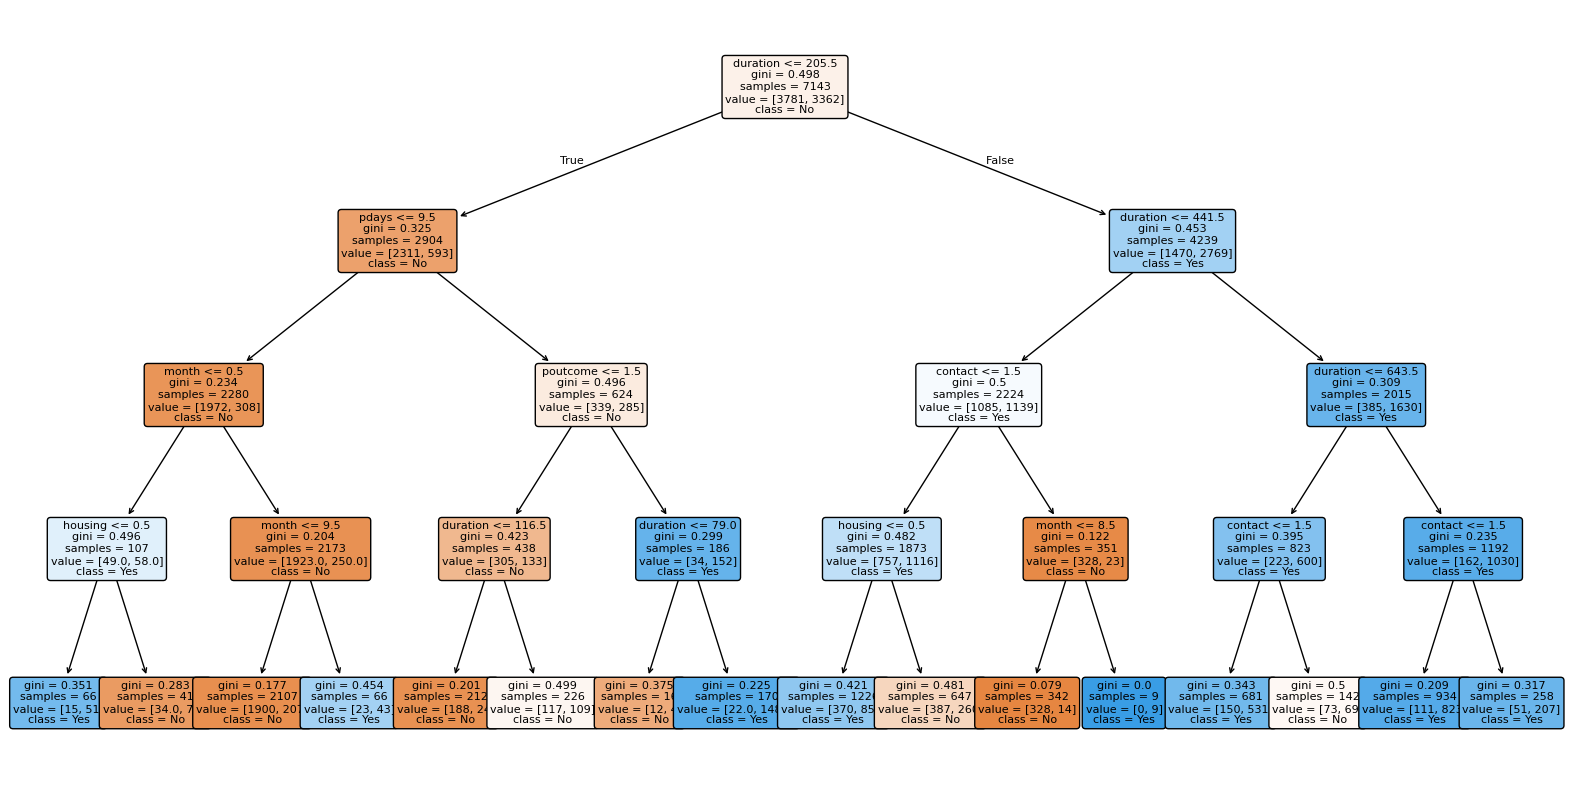

In [1312]:
# Plot the tree
plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(dt_classifier_4, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True,fontsize=8)
plt.show()


# Interpretation of the Decision Tree Flow(Path: True from Node to Leaf)

The decision tree follows a series of conditions, starting at the root node and progressing through intermediate nodes until it reaches a leaf node. Below is a step-by-step interpretation of the "True" path (conditions that evaluate as True):

---

### **Root Node:**
- **Condition**: `duration <= 205.5`
- **Gini Impurity**: 0.498
- **Samples**: 7143
- **Class Distribution (Value)**: [3781, 3362] (Class 'No' = 3781, Class 'Yes' = 3362)
- **Predicted Class**: 'No'
  
#### **Interpretation**:
At the root node, the first decision is based on the feature `duration`. If `duration <= 205.5`, the model moves forward along this path. The Gini impurity value of 0.498 indicates a moderate level of impurity, meaning there is some mix of both classes ('No' and 'Yes'). The node contains 7143 samples, with a near-equal distribution of 'No' (3781 samples) and 'Yes' (3362 samples). However, since the majority class is 'No', the root node predicts 'No' for data points that satisfy this condition.

---

### **First Level Node:**
- **Condition**: `pdays <= 9.5`
- **Gini Impurity**: 0.325
- **Samples**: 2904
- **Class Distribution (Value)**: [2311, 593] (Class 'No' = 2311, Class 'Yes' = 593)
- **Predicted Class**: 'No'
  
#### **Interpretation**:
If `pdays <= 9.5`, the decision tree moves to the next node. The Gini impurity value of 0.325 is lower than the root, indicating that this node is more pure, with a stronger indication of a dominant class. Of the 2904 samples in this node, 2311 belong to class 'No' and 593 belong to class 'Yes', showing a clear majority of 'No'. The model predicts 'No' for any new data point that reaches this node.

---

### **Second Level Node:**
- **Condition**: `month <= 0.5`
- **Gini Impurity**: 0.234
- **Samples**: 2280
- **Class Distribution (Value)**: [1972, 308] (Class 'No' = 1972, Class 'Yes' = 308)
- **Predicted Class**: 'No'
  
#### **Interpretation**:
The next condition is based on the `month` feature. If `month <= 0.5`, the model progresses to this node, which has a relatively low Gini impurity of 0.234, indicating a higher purity. In this node, the majority of samples (1972 out of 2280) belong to class 'No', while 308 belong to class 'Yes'. The model predicts 'No' for any data point that satisfies this condition.

---

### **Third Level Node:**
- **Condition**: `housing <= 0.5`
- **Gini Impurity**: 0.496
- **Samples**: 107
- **Class Distribution (Value)**: [49, 58] (Class 'No' = 49, Class 'Yes' = 58)
- **Predicted Class**: 'Yes'
  
#### **Interpretation**:
At this node, the model checks whether `housing <= 0.5`. This node has a Gini impurity of 0.496, which is quite high, indicating that the samples in this node are mixed between the two classes. Out of 107 samples, 49 belong to class 'No', and 58 belong to class 'Yes', showing a slight majority for class 'Yes'. Therefore, the model predicts class 'Yes' for data points that meet this condition.

---

### **Leaf Node:**
- **Gini Impurity**: 0.351
- **Samples**: 66
- **Class Distribution (Value)**: [15, 51] (Class 'No' = 15, Class 'Yes' = 51)
- **Predicted Class**: 'Yes'

#### **Interpretation**:
Finally, we reach the leaf node. This node has a Gini impurity of 0.351, which indicates that it is fairly pure but still has a slight amount of mixed class labels. Out of the 66 samples in this leaf, 15 belong to class 'No' and 51 belong to class 'Yes'. Given that the majority of the samples in this leaf are labeled as 'Yes', the model predicts 'Yes' for new data that satisfies all the conditions leading up to this leaf.

---

### 4.8 Feature Importance from Decision Tree

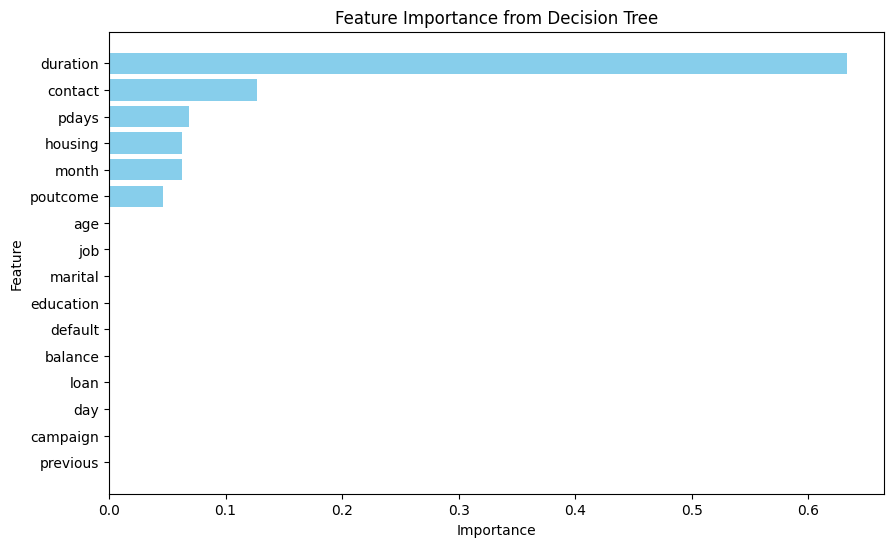

In [1313]:
# Assuming dt_classifier_4 is your trained decision tree model
feature_importances = dt_classifier_4.feature_importances_

# Create a DataFrame to store feature names and importance values
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()


## Interpretation of the Feature Importance Bar Graph

- **Highly Important Features**: 
    - `duration`, `contact`, and `pdays` stand out as the most influential variables in the decision-making process. Among them, `duration` is the most significant feature.

- **Moderately Important Features**: 
    - `housing`, `month`, and `poutcome` also contribute to the model's predictions, though their importance is lower compared to the highly important features.

- **Irrelevant Features**: 
    - Several features, including `age`, `job`, `marital`, `education`, `balance`, `loan`, `day`, `campaign`, and `previous`, have zero or negligible importance. This suggests that these features do not affect the model’s predictions, possibly indicating that they are either irrelevant or redundant. 
    - **Redundant** refers to features that do not provide additional unique information to the model and whose contribution is negligible once the more important features are considered.


___
##  Recommendations for the Bank

- Prioritize customers with longer contact durations, as this is the most significant predictor of term deposit subscriptions.
- Conduct research to identify the most preferred communication methods, as the type of contact is a key predictor.
- Consistently update the timing of the last contact and maintain active engagement with customers, as the recency of contact also influences deposit decisions.
___